In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
#Read data
data = pd.read_excel('data_balanced_month.xlsx')
data.head()

,month,Age,Amount_netCN,TermOfPaymentDays,GDP by State,Unemployment rate,ZIP,DefaultStatus,month1,month2,month3,month4,month5,Feq_default_ZipCode
0,9,52,42.89,30,37100,0.051,26349,0,0,1,0,0,0,0.0
1,11,65,9.99,30,46300,0.031,79285,0,0,0,0,1,0,0.0
2,9,58,50.87,30,29400,0.057,15898,0,0,1,0,0,0,0.0
3,10,60,80.78,30,47900,0.027,63785,0,0,0,1,0,0,0.0
4,10,51,49.90,30,39400,0.066,33758,0,0,0,1,0,0,0.0


In [3]:
data.columns

Index(['month', 'Age', 'Amount_netCN', 'TermOfPaymentDays', 'GDP by State',
       'Unemployment rate', 'ZIP', 'DefaultStatus', 'month1', 'month2',
       'month3', 'month4', 'month5', 'Feq_default_ZipCode'],
      dtype='object')

In [4]:
# Discretize the variable time_since_last_donation in 10 bins
data["bins_Amount_netCN"] = pd.qcut(data["Amount_netCN"],5)

# Print the group sizes of the discretized variable
print(data.groupby("bins_Amount_netCN").size())

bins_Amount_netCN
(9.989, 50.88]    506
(50.88, 60.87]    277
(60.87, 70.78]    335
(70.78, 88.3]     331
(88.3, 481.97]    363
dtype: int64


In [5]:
print(data.groupby("TermOfPaymentDays").size())

TermOfPaymentDays
30     1721
51        6
52        7
82       27
110       1
111       2
112       5
113      18
140       1
141       4
142       1
143       3
144      13
172       1
174       2
dtype: int64


In [6]:
# Discretize the variable 
data["bins_TermOfPaymentDays"] = pd.cut(data['TermOfPaymentDays'],[0, 30, 100, 233])

# Count the number of observations per group
print(data.groupby("bins_TermOfPaymentDays").size())

bins_TermOfPaymentDays
(0, 30]       1721
(30, 100]       40
(100, 233]      51
dtype: int64


In [7]:
# Discretize the variable time_since_last_donation in 10 bins
data["bins_GDP by State"] = pd.qcut(data["GDP by State"],5)

# Print the group sizes of the discretized variable
print(data.groupby("bins_GDP by State").size())

bins_GDP by State
(27899.999, 33600.0]    392
(33600.0, 39400.0]      681
(39400.0, 40600.0]       82
(40600.0, 46700.0]      354
(46700.0, 65600.0]      303
dtype: int64


In [8]:
# Discretize the variable time_since_last_donation in 10 bins
data["bins_Unemployment rate"] = pd.qcut(data["Unemployment rate"],5)

# Print the group sizes of the discretized variable
print(data.groupby("bins_Unemployment rate").size())


bins_Unemployment rate
(0.026, 0.031]    491
(0.031, 0.051]    451
(0.051, 0.053]    146
(0.053, 0.066]    501
(0.066, 0.102]    223
dtype: int64


In [9]:
# Discretize the variable time_since_last_donation in 10 bins
data["bins_Age"] = pd.qcut(data["Age"],5)

# Print the group sizes of the discretized variable
print(data.groupby("bins_Age").size())

bins_Age
(17.999, 49.0]    387
(49.0, 57.0]      357
(57.0, 64.0]      393
(64.0, 72.0]      334
(72.0, 95.0]      341
dtype: int64


In [31]:
data["month"].value_counts()

9     1460
8      241
10      79
11      29
12       3
Name: month, dtype: int64

In [32]:
# Discretize the variable time_since_last_donation in 10 bins
x = data["month"].value_counts()
x

9     1460
8      241
10      79
11      29
12       3
Name: month, dtype: int64

In [38]:
# Discretize the variable time_since_last_donation in 10 bins
data["bins_month"] = data.groupby('month').size()

# Print the group sizes of the discretized variable
print(data.groupby('month').size())

month
8      241
9     1460
10      79
11      29
12       3
dtype: int64


In [10]:
# Discretize the variable time_since_last_donation in 10 bins
data["bins_Feq_default_ZipCode"] = pd.qcut(data["Feq_default_ZipCode"],2)

# Print the group sizes of the discretized variable
print(data.groupby("bins_Feq_default_ZipCode").size())

bins_Feq_default_ZipCode
(-0.001, 0.143]    938
(0.143, 1.0]       874
dtype: int64


In [34]:
type(data["bins_Feq_default_ZipCode"])

pandas.core.series.Series

In [11]:
print(data.groupby("Feq_default_ZipCode").size())

Feq_default_ZipCode
0.000000    727
0.050000      2
0.066667      4
0.071429     11
0.076923      1
0.083333     12
0.090909     13
0.100000     26
0.105263      3
0.111111     21
0.125000     49
0.142857     69
0.166667     69
0.181818      5
0.200000     99
0.214286      3
0.222222     12
0.250000    104
0.285714     18
0.333333    180
0.375000      6
0.400000     47
0.428571      3
0.500000    199
0.666667     22
1.000000    107
dtype: int64


In [12]:
# Select the income and target columns
basetable_Age = data[["DefaultStatus","bins_Age"]]

# Group basetable_income by income
groups = basetable_Age.groupby("bins_Age")

# Calculate the target incidence and print the result
incidence_size = groups["DefaultStatus"].agg({'Incidence' : np.mean, 'Size' : np.size}).reset_index()
incidence_size

,bins_Age,Incidence,Size
0,"(17.999, 49.0]",0.736434,387
1,"(49.0, 57.0]",0.523810,357
2,"(57.0, 64.0]",0.460560,393
3,"(64.0, 72.0]",0.434132,334
4,"(72.0, 95.0]",0.316716,341


In [13]:
# Function that creates predictor insight graph table
def create_pig_table(basetable, target, variable):
  
    # Create groups for each variable
    groups = basetable[[target,variable]].groupby(variable)
    
    # Calculate size and target incidence for each group
    pig_table = groups[target].agg({'Incidence' : np.mean, 'Size' : np.size}).reset_index()
    
    # Return the predictor insight graph table
    return pig_table

In [14]:
# Create the list of variables for our predictor insight graph tables
variables = ['bins_Age', "bins_Amount_netCN", "bins_TermOfPaymentDays", "bins_GDP by State", "bins_Unemployment rate", "bins_Feq_default_ZipCode"]

# Create an empty dictionary
pig_tables = {}

# Loop through the variables
for variable in variables:
  
    # Create a predictor insight graph table
    pig_table = create_pig_table(data, 'DefaultStatus', variable)
    
    # Add the table to the dictionary
    pig_tables[variable] = pig_table

In [15]:
# Print the predictor insight graph table of the variable "disc_time_since_last_gift"
print(pig_tables["bins_Amount_netCN"])

bins_Amount_netCN  Incidence  Size
0    (9.989, 50.88]   0.486166   506
1    (50.88, 60.87]   0.552347   277
2    (60.87, 70.78]   0.498507   335
3     (70.78, 88.3]   0.510574   331
4    (88.3, 481.97]   0.471074   363


In [16]:
# The function to plot a predictor insight graph.
def plot_incidence(pig_table, variable):
    
    # Plot the incidence line
    pig_table["Incidence"].plot()
    
    # Formatting the predictor insight graph
    plt.xticks(np.arange(len(pig_table)), pig_table[variable])
    plt.xlim([-0.5, len(pig_table) - 0.5])
    plt.ylim([0, max(pig_table["Incidence"]*2)])
    plt.ylabel("Incidence", rotation=0, rotation_mode="anchor", ha="right")
    plt.xlabel(variable)
    
    # Show the graph
    plt.show()

In [17]:
pig_tables["bins_Amount_netCN"]

,bins_Amount_netCN,Incidence,Size
0,"(9.989, 50.88]",0.486166,506
1,"(50.88, 60.87]",0.552347,277
2,"(60.87, 70.78]",0.498507,335
3,"(70.78, 88.3]",0.510574,331
4,"(88.3, 481.97]",0.471074,363


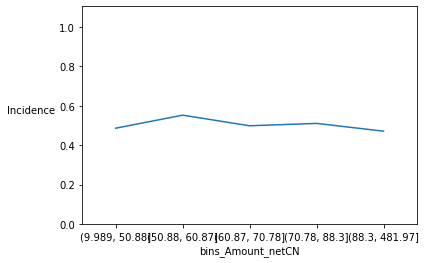

In [18]:
# Apply the function for the variable "country".
plot_incidence(pig_tables["bins_Amount_netCN"], "bins_Amount_netCN")

In [19]:
# The function to plot a predictor insight graph
def plot_pig(pig_table, variable):
    
    # Plot formatting
    plt.ylabel("Size", rotation=0, rotation_mode="anchor", ha="right")
    
    # Plot the bars with sizes 
    pig_table["Size"].plot(kind="bar", width=0.5, color="lightgray", edgecolor="none") 
    
    # Plot the incidence line on secondary axis
    pig_table["Incidence"].plot(secondary_y=True)
    
    # Plot formatting
    plt.xticks(np.arange(len(pig_table)), pig_table[variable])
    plt.xlim([-0.5, len(pig_table) - 0.5])
    plt.ylabel("Incidence", rotation=0, rotation_mode="anchor", ha="left")
    
    # Show the graph
    plt.show()

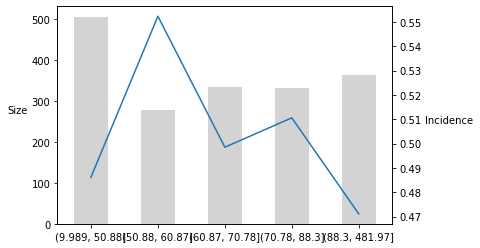

In [20]:
plot_pig(pig_tables["bins_Amount_netCN"], "bins_Amount_netCN")

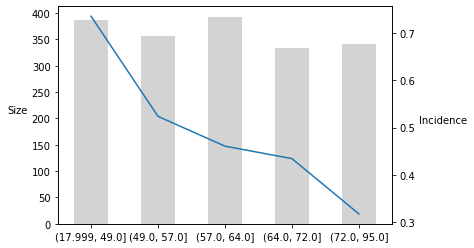

In [21]:
plot_pig(pig_tables["bins_Age"], "bins_Age")

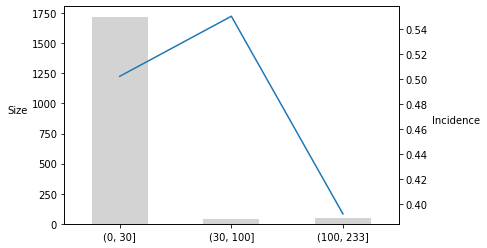

In [22]:
plot_pig(pig_tables["bins_TermOfPaymentDays"], "bins_TermOfPaymentDays")

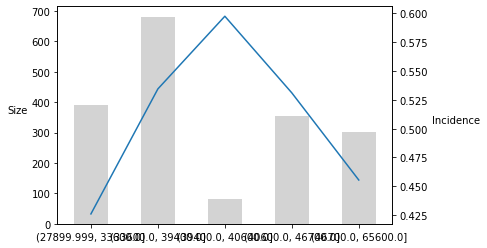

In [23]:
plot_pig(pig_tables["bins_GDP by State"], "bins_GDP by State")

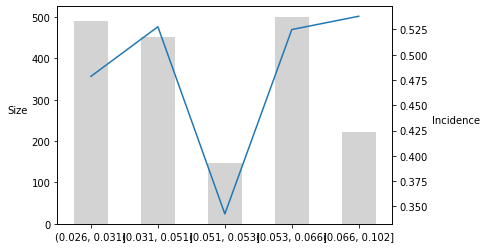

In [24]:
plot_pig(pig_tables["bins_Unemployment rate"], "bins_Unemployment rate")

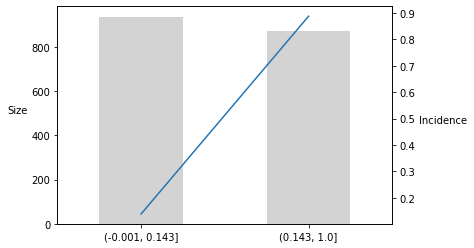

In [25]:
plot_pig(pig_tables["bins_Feq_default_ZipCode"], "bins_Feq_default_ZipCode")

In [39]:
data

,month,Age,Amount_netCN,TermOfPaymentDays,GDP by State,Unemployment rate,ZIP,DefaultStatus,month1,month2,...,month4,month5,Feq_default_ZipCode,bins_Amount_netCN,bins_TermOfPaymentDays,bins_GDP by State,bins_Unemployment rate,bins_Age,bins_Feq_default_ZipCode,bins_month
0,9,52,42.89,30,37100,0.051,26349,0,0,1,...,0,0,0.0,"(9.989, 50.88]","(0, 30]","(33600.0, 39400.0]","(0.031, 0.051]","(49.0, 57.0]","(-0.001, 0.143]",NaN
1,11,65,9.99,30,46300,0.031,79285,0,0,0,...,1,0,0.0,"(9.989, 50.88]","(0, 30]","(40600.0, 46700.0]","(0.026, 0.031]","(64.0, 72.0]","(-0.001, 0.143]",NaN
2,9,58,50.87,30,29400,0.057,15898,0,0,1,...,0,0,0.0,"(9.989, 50.88]","(0, 30]","(27899.999, 33600.0]","(0.053, 0.066]","(57.0, 64.0]","(-0.001, 0.143]",NaN
3,10,60,80.78,30,47900,0.027,63785,0,0,0,...,0,0,0.0,"(70.78, 88.3]","(0, 30]","(46700.0, 65600.0]","(0.026, 0.031]","(57.0, 64.0]","(-0.001, 0.143]",NaN
4,10,51,49.90,30,39400,0.066,33758,0,0,0,...,0,0,0.0,"(9.989, 50.88]","(0, 30]","(33600.0, 39400.0]","(0.053, 0.066]","(49.0, 57.0]","(-0.001, 0.143]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,8,83,40.88,30,46700,0.045,61273,1,1,0,...,0,0,1.0,"(9.989, 50.88]","(0, 30]","(40600.0, 46700.0]","(0.031, 0.051]","(72.0, 95.0]","(0.143, 1.0]",NaN
1808,8,43,100.58,30,36200,0.064,66123,1,1,0,...,0,0,1.0,"(88.3, 481.97]","(0, 30]","(33600.0, 39400.0]","(0.053, 0.066]","(17.999, 49.0]","(0.143, 1.0]",NaN
1809,8,52,80.78,30,36600,0.045,67468,1,1,0,...,0,0,1.0,"(70.78, 88.3]","(0, 30]","(33600.0, 39400.0]","(0.031, 0.051]","(49.0, 57.0]","(0.143, 1.0]",NaN
1810,8,50,70.87,30,46700,0.045,34549,1,1,0,...,0,0,1.0,"(70.78, 88.3]","(0, 30]","(40600.0, 46700.0]","(0.031, 0.051]","(49.0, 57.0]","(0.143, 1.0]",NaN


In [40]:
# Select the income and target columns
#basetable_month = data[["DefaultStatus","bins_Age"]]

# Group basetable_income by income
groups = data.groupby("month")

# Calculate the target incidence and print the result
incidence_size = groups["DefaultStatus"].agg({'Incidence' : np.mean, 'Size' : np.size}).reset_index()
incidence_size

,month,Incidence,Size
0,8,0.601660,241
1,9,0.521233,1460
2,10,0.000000,79
3,11,0.000000,29
4,12,0.000000,3


In [41]:
pig_tables["bins_month"] = incidence_size

In [43]:
pig_tables

{'bins_Age':          bins_Age  Incidence  Size
 0  (17.999, 49.0]   0.736434   387
 1    (49.0, 57.0]   0.523810   357
 2    (57.0, 64.0]   0.460560   393
 3    (64.0, 72.0]   0.434132   334
 4    (72.0, 95.0]   0.316716   341,
 'bins_Amount_netCN':   bins_Amount_netCN  Incidence  Size
 0    (9.989, 50.88]   0.486166   506
 1    (50.88, 60.87]   0.552347   277
 2    (60.87, 70.78]   0.498507   335
 3     (70.78, 88.3]   0.510574   331
 4    (88.3, 481.97]   0.471074   363,
 'bins_TermOfPaymentDays':   bins_TermOfPaymentDays  Incidence  Size
 0                (0, 30]   0.502034  1721
 1              (30, 100]   0.550000    40
 2             (100, 233]   0.392157    51,
 'bins_GDP by State':       bins_GDP by State  Incidence  Size
 0  (27899.999, 33600.0]   0.426020   392
 1    (33600.0, 39400.0]   0.534508   681
 2    (39400.0, 40600.0]   0.597561    82
 3    (40600.0, 46700.0]   0.531073   354
 4    (46700.0, 65600.0]   0.455446   303,
 'bins_Unemployment rate':   bins_Unemployment r

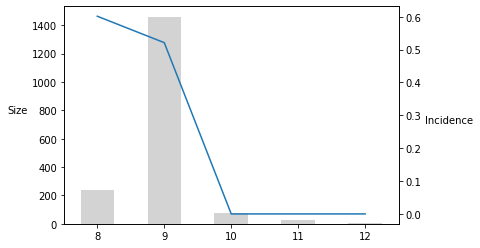

In [44]:
plot_pig(pig_tables["bins_month"], "month")
